In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Files/wisconsin_cancer.csv")



In [13]:
from sklearn.preprocessing import StandardScaler

# Select relevant features and diagnosis
features = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']]
diagnosis = data['diagnosis']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

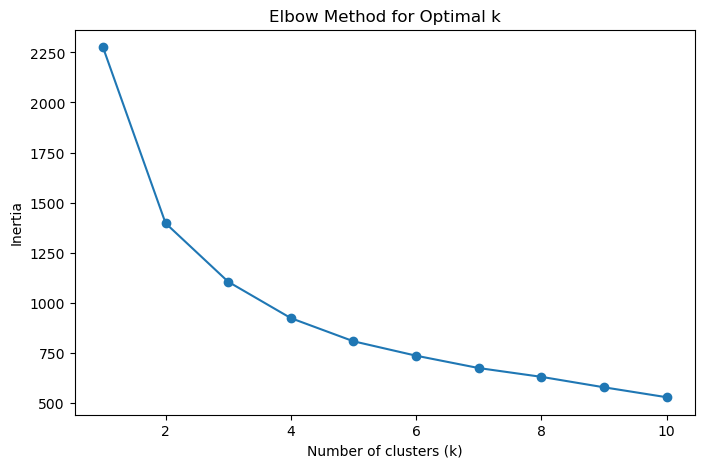

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

# Elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
# Set the optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jcity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


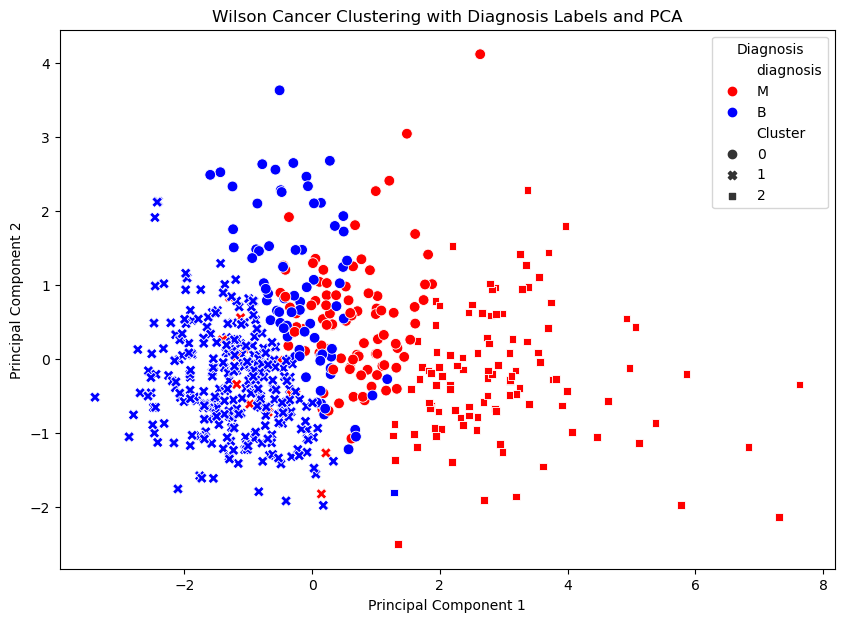

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
data['PCA1'] = pca_features[:, 0]
data['PCA2'] = pca_features[:, 1]

# Plot clusters with PCA components and overlay diagnosis
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue=data['diagnosis'], style=data['Cluster'], 
                palette={'B': 'blue', 'M': 'red'}, s=60, data=data)
plt.title('Wilson Cancer Clustering with Diagnosis Labels and PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis')
plt.show()

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Cluster,PCA1,PCA2
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1,1.132613,2.461378
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1,2.003608,-0.469538
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1,2.384093,0.598358
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,2,-0.161396,2.633885
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1,1.952322,0.894495


In [9]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'Cluster',
       'PCA1', 'PCA2'],
      dtype='object')